In [32]:
import pytrends
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pytrends.request import TrendReq
from pytrends import dailydata

In [33]:
pytrend = TrendReq(hl='IT', geo='IT', tz=360)

## 1. Finding Suggestions for queries

In [34]:
keywords = pytrend.suggestions(keyword='Coronavirus')

kw = pd.DataFrame(keywords)
kw.drop(columns= 'mid')   # This column dropped bc it makes no sense

,title,type
0,Coronavirus,Virus
1,Coronavirus disease 2019,Argomento
2,Vaccino COVID-19,Vaccino
3,Vaccino anti COVID-19 Pfizer-BioNTech,Vaccino
4,SARS-CoV-2,Virus


In [35]:
keywords = pytrend.suggestions(keyword='SARS-CoV-2')

kw = pd.DataFrame(keywords)
kw.drop(columns= 'mid')   # This column dropped bc it makes no sense

,title,type
0,Coronavirus disease 2019,Argomento
1,Vaccino COVID-19,Vaccino
2,SARS-CoV-2,Virus
3,Test antigenico rapido per SARS-CoV-2,Argomento
4,Variante Delta del coronavirus,Argomento


In [36]:
keywords = pytrend.suggestions(keyword='Sintomi Covid')

kw = pd.DataFrame(keywords)
kw.drop(columns= 'mid')   # This column dropped bc it makes no sense

,title,type
0,Vaccino COVID-19,Vaccino
1,Sindrome post-COVID-19,Argomento
2,Pandemia di COVID-19 in Scozia,Caso
3,Ad5-nCoV,Vaccino


In [37]:
keywords = pytrend.suggestions(keyword='Terapia Intensiva')

kw = pd.DataFrame(keywords)
kw.drop(columns= 'mid')   # This column dropped bc it makes no sense

,title,type
0,Terapia intensiva,Argomento
1,Terapia intensiva,Specialità medica
2,UTIN,Argomento
3,Unità di terapia intensiva cardiologica,Argomento
4,Sindrome post-terapia intensiva,Argomento


In [38]:
keywords = pytrend.suggestions(keyword='Vaccino Covid')

kw = pd.DataFrame(keywords)
kw.drop(columns= 'mid')   # This column dropped bc it makes no sense

,title,type
0,Vaccino COVID-19,Vaccino
1,Vaccino anti COVID-19 Pfizer-BioNTech,Vaccino
2,mRNA-1273,Vaccino
3,Ad26.CoV2.S,Vaccino
4,AZD1222,Vaccino


## 2. Looking at Related Queries and Topics

In [39]:
kw_list = ['Coronavirus', 'SARS-CoV-2', 'Sintomi Covid', 'Vaccino Covid-19', 'Terapia Intensiva']

pytrend.build_payload(kw_list=kw_list, timeframe='2020-01-01 2022-04-30')

related_queries = pytrend.related_queries() # related_queries returns a dictionary of dataframes

In [40]:
def related_queries_top(rel_q):

    rq_top_df= pd.DataFrame(columns=['query', 'value'])

    for keyword in rel_q:

        df = pd.DataFrame(related_queries.get(keyword).get('top'))

        rq_top_df = pd.concat((rq_top_df, df))

    rq_top_df = rq_top_df.sort_values('value', ascending=False)

    return rq_top_df

In [41]:
def related_queries_rise(rel_q):

    rq_rise_df = pd.DataFrame(columns=['query', 'value'])

    for keyword in rel_q:

        df = pd.DataFrame(rel_q.get(keyword).get('rising'))

        rq_rise_df = pd.concat((rq_rise_df, df))

    rq_rise_df = rq_rise_df.sort_values('value', ascending=False)

    return rq_rise_df

Related queries with the '**top**' method:

In [42]:
related_queries_top(rel_q=related_queries).head(10)

,query,value
0,coronavirus italia,100
0,in terapia intensiva,100
0,sars,100
0,sintomi di covid,100
0,vaccino anti covid-19,100
1,covid-19,93
1,sintomi del covid,77
2,sars cov 2,76
2,sintomi covid 19,74
3,covid 19,74


Related queries with the '**rising**' method:

In [43]:
related_queries_rise(rel_q=related_queries).head(10)

,query,value
0,vaccino anti covid-19,7597050
2,vaccino covid,5099550
1,covid,5099550
0,terapia intensiva covid,2807350
3,vaccino anti covid,2649550
4,vaccino coronavirus,2004650
1,coronavirus terapia intensiva,1768400
0,sintomi di covid,1591000
1,sintomi del covid,1223450
2,sintomi covid 19,1177600


In [44]:
related_topics = pytrend.related_topics() # related_topics returns a dictionary of dataframes

In [45]:
def related_topic_top(rel_t):

    rt_top_df = pd.DataFrame(columns=['topic_title', 'topic_type', 'value', 'hasData'])

    for topic in rel_t:

        df = pd.DataFrame(rel_t.get(topic).get('top'))
        df = df.drop(columns= ['topic_mid', 'formattedValue', 'link'])

        rt_top_df = pd.concat((rt_top_df, df))

    rt_top_df = rt_top_df.sort_values('value', ascending=False)

    return rt_top_df

In [46]:
def related_topic_rise(rel_t):

    rt_rise_df = pd.DataFrame(columns=['topic_title', 'topic_type', 'value', 'hasData'])

    for topic in rel_t:

        df = pd.DataFrame(rel_t.get(topic).get('rising'))
        df = df.drop(columns= ['topic_mid', 'formattedValue', 'link'])

        rt_rise_df = pd.concat((rt_rise_df, df))

    rt_rise_df = rt_rise_df.sort_values('value', ascending=False)

    return rt_rise_df

Related topics with '**top**' method

In [47]:
related_topic_top(rel_t=related_topics).head(10)

,topic_title,topic_type,value,hasData


Related topics with '**rising**' method

In [48]:
related_topic_rise(rel_t=related_topics).head(10)

,topic_title,topic_type,value,hasData


## 3. Requesting Interest Over Time

To request **daily data** for a timeframe larger than 90 days, we need to iterate our request for each month. Luckily, ***pytrends.dailydata()*** performs this operation this for us.

In [49]:
kw_list = ['Coronavirus', 'SARS-CoV-2', 'Sintomi Covid', 'Vaccino Covid-19', 'Terapia Intensiva']

In [50]:
def multiple_daily_interest(keywords, start_year, start_mon, stop_year, stop_mon, geo):

    '''Returns a dataframe with the daily Google Trends Query Index for a list of words'''

    daily_interest = pd.DataFrame()

    for keyword in keywords:
    
        dd = dailydata.get_daily_data(word=keyword, start_year=start_year, start_mon=start_mon,
                        stop_year=stop_year, stop_mon=stop_mon, geo=geo, verbose=False)

        dd = dd[[keyword]]

        daily_interest = pd.concat([daily_interest, dd], axis=1)
    
    return daily_interest

In [51]:
# this may take a while..

daily_covid_int = multiple_daily_interest(keywords=kw_list, start_year=2020, start_mon=1,
                    stop_year=2022, stop_mon=4, geo='IT')

In [ ]:
daily_covid_int

,Coronavirus,SARS-CoV-2,Sintomi Covid,Vaccino Covid-19,Terapia Intensiva
date,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN
2020-01-05,0.00,NaN,NaN,NaN,1.11
...,...,...,...,...,...
2022-04-26,0.71,10.20,14.04,1.14,0.45
2022-04-27,0.70,1.65,10.62,1.10,1.32
2022-04-28,0.70,3.30,12.06,0.00,2.46


## ATTENZIONE

KeyError: 'Sintomi Covid'

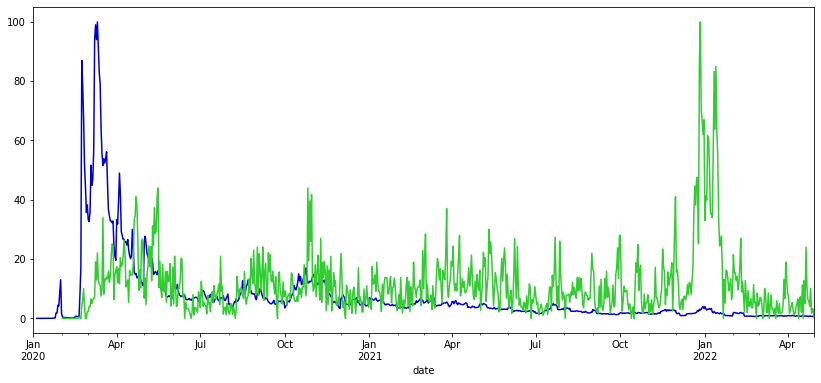

In [ ]:
# creating graph
fig, ax = plt.subplots(figsize=(14, 6))

daily_covid_int['Coronavirus'].plot(color='mediumblue')
daily_covid_int['SARS-CoV-2'].plot(color='limegreen')
daily_covid_int['Sintomi Covid'].plot(color='orange')
daily_covid_int['Vaccino Covid-19'].plot(color='red')
daily_covid_int['Terapia Intensiva'].plot(color='magenta')
# adding legend, title and labels
ax.legend(ncol=1, loc='upper right', frameon=True)
plt.title('Covid-19 Daily Queries (ITA)', fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Query Index')

In [27]:
daily_covid_int.head()

,Coronavirus,SARS-CoV-2,Sintomi Covid,Vaccino Covid-19,Terapia Intensiva
date,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN
2020-01-05,0.0,NaN,NaN,NaN,1.11


In [28]:
# translating colnames in english

mapping = {daily_covid_int.columns[0]:'Coronavirus',
        daily_covid_int.columns[1]:'SARS-CoV-2', daily_covid_int.columns[2]:'Covid Symptoms',
        daily_covid_int.columns[3]:'Covid Vaccine', daily_covid_int.columns[4]:'Intensive Care'}

daily_covid_int = daily_covid_int.rename(columns = mapping)

In [30]:
daily_covid_int.to_csv('gt_04052022')